In [1]:
# %pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.datasets import sunspots

In [3]:
data = sunspots.load_pandas().data['SUNACTIVITY']
display(data.head())
print(type(data))

0     5.0
1    11.0
2    16.0
3    23.0
4    36.0
Name: SUNACTIVITY, dtype: float64

<class 'pandas.core.series.Series'>


In [4]:
data

0       5.0
1      11.0
2      16.0
3      23.0
4      36.0
       ... 
304    40.4
305    29.8
306    15.2
307     7.5
308     2.9
Name: SUNACTIVITY, Length: 309, dtype: float64

In [5]:
print('Max: ', data.max())
print('Min: ', data.min())

Max:  190.2
Min:  0.0


In [6]:
print('Mean: ', data.mean())
print('Median: ', data.median())
print('Summary\n', data.describe())
print('Length: ', len(data))

Mean:  49.75210355987054
Median:  40.0
Summary
 count    309.000000
mean      49.752104
std       40.452595
min        0.000000
25%       16.000000
50%       40.000000
75%       69.800000
max      190.200000
Name: SUNACTIVITY, dtype: float64
Length:  309


In [7]:
print('Start: ', data.index[0])
print('End: ', data.index[-1])

Start:  0
End:  308


In [8]:
# Difference between peaks
autocorr = data.autocorr(lag = 12)
print(f'Cycle autocorrelation at lag 12: {autocorr:.2f}')

Cycle autocorrelation at lag 12: 0.47


In [9]:
sun2 = data.loc[1749:1763]
print(sun2)

Series([], Name: SUNACTIVITY, dtype: float64)


In [10]:
data = sunspots.load_pandas().data

sunspots_series = data['SUNACTIVITY']
sunspots_series.index = data['YEAR']

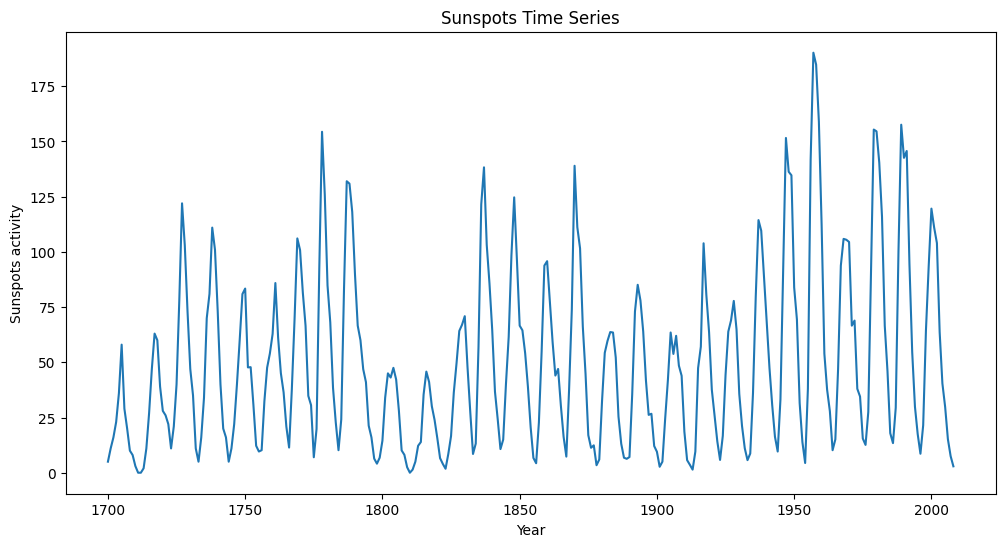

In [11]:
plt.figure(figsize=(12, 6))

sunspots_series.plot()
plt.title('Sunspots Time Series')
plt.xlabel('Year')
plt.ylabel('Sunspots activity')
plt.show()

## Histogram

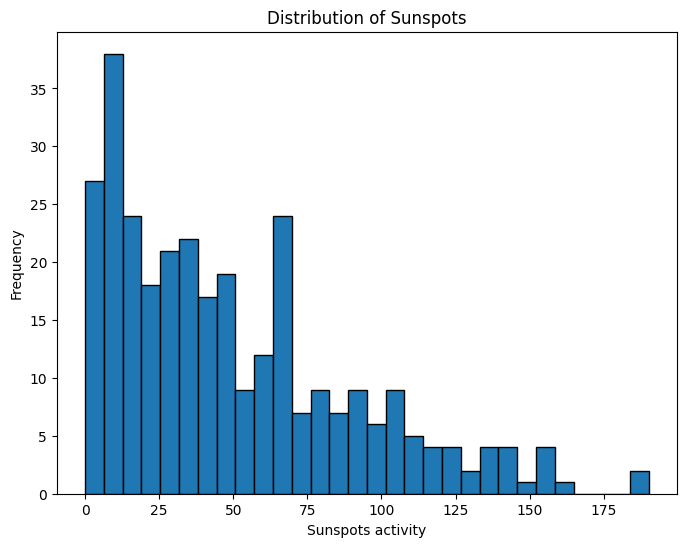

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(sunspots_series, bins=30, edgecolor='black')
plt.title('Distribution of Sunspots')
plt.xlabel('Sunspots activity')
plt.ylabel('Frequency')
plt.show()

## Boxplot

Text(0, 0.5, 'Sunspot Activity')

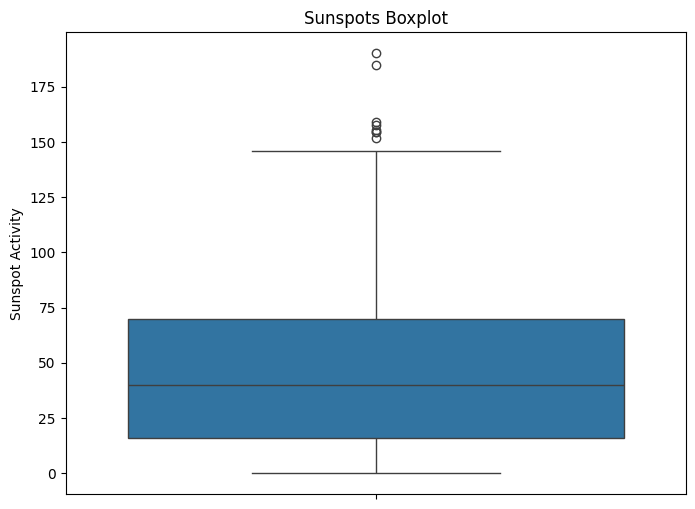

In [13]:
plt.figure(figsize = (8, 6))
sns.boxplot(y = sunspots_series)
plt.title('Sunspots Boxplot')
plt.ylabel('Sunspot Activity')

## GGplot

Text(0, 0.5, 'Sunspot Activity')

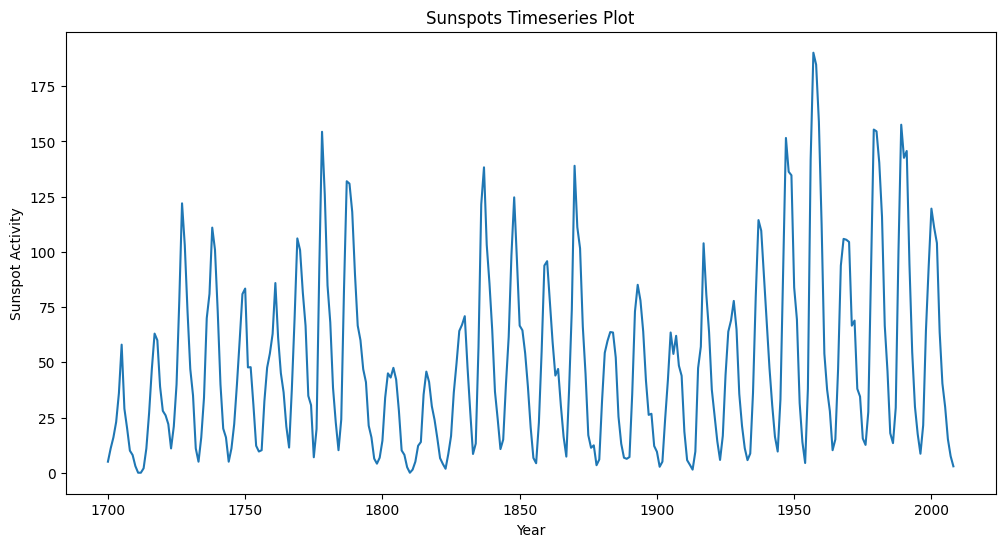

In [14]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = sunspots_series.index, y = sunspots_series)
plt.title('Sunspots Timeseries Plot')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')

## Plot some subset

In [16]:
sub_sunspots = sunspots_series.loc[1749:1763]
sub_sunspots.head()

YEAR
1749.0    80.9
1750.0    83.4
1751.0    47.7
1752.0    47.8
1753.0    30.7
Name: SUNACTIVITY, dtype: float64

Text(0, 0.5, 'Sunspots activity')

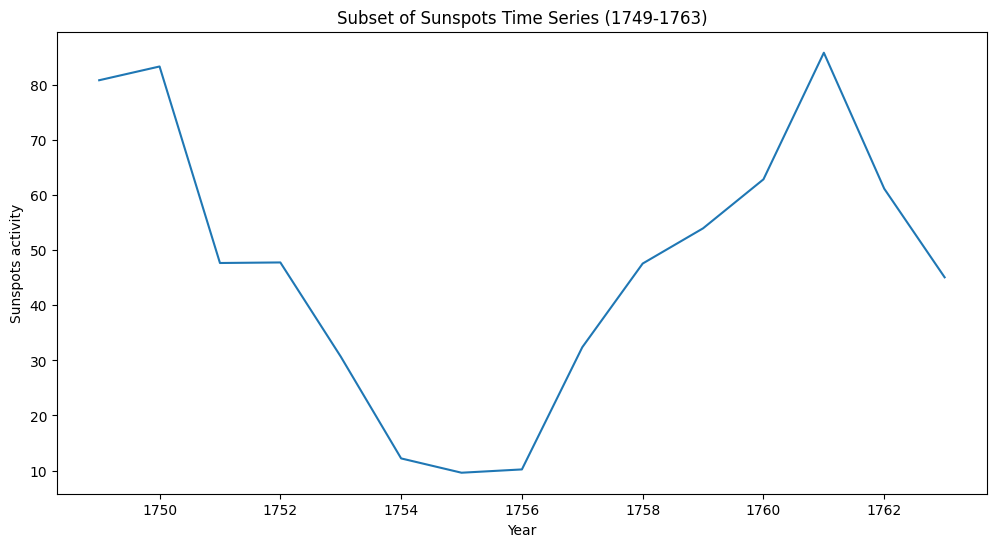

In [17]:
plt.figure(figsize = (12, 6))
sub_sunspots.plot()
plt.title('Subset of Sunspots Time Series (1749-1763)')
plt.xlabel('Year')
plt.ylabel('Sunspots activity')

## Histogram of some subset

Text(0, 0.5, 'Sunspots activity')

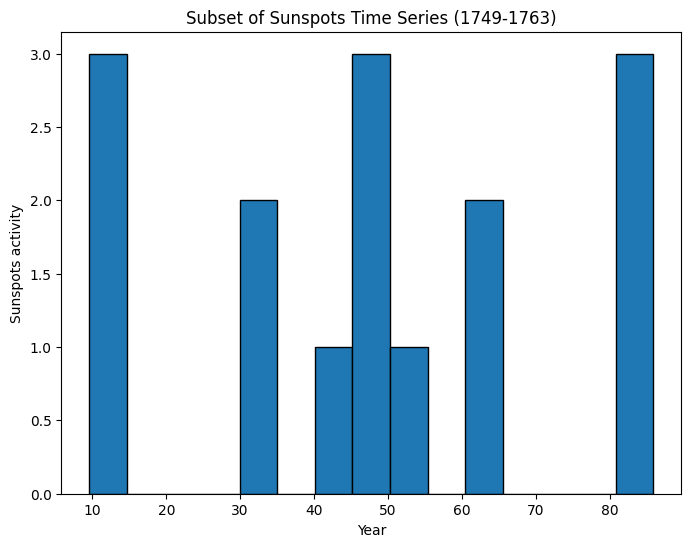

In [19]:
plt.figure(figsize = (8, 6))
plt.hist(sub_sunspots, bins = 15, edgecolor = 'black')
plt.title('Subset of Sunspots Time Series (1749-1763)')
plt.xlabel('Year')
plt.ylabel('Sunspots activity')

## Boxplot of some subset

Text(0, 0.5, 'Sunspot Activity')

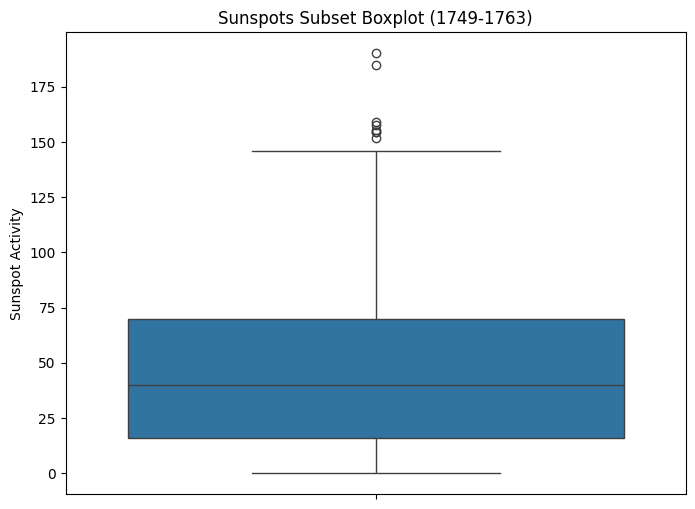

In [21]:
plt.figure(figsize = (8, 6))
sns.boxplot(y = sunspots_series)
plt.title('Sunspots Subset Boxplot (1749-1763)')
plt.ylabel('Sunspot Activity')

## Create some artificial monthly data

In [24]:
dates = pd.date_range(start = '1749-01-01', end = '1763-12-31', freq = 'ME')
monthly_data = pd.Series(
    np.random.normal(
        sub_sunspots.mean(),
        sub_sunspots.std(),
        size = len(dates)
    ),
    index = dates)

Text(0, 0.5, 'Mean Sunspot Activity')

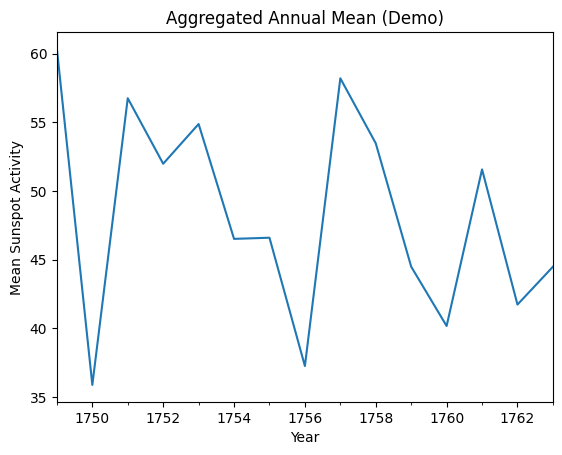

In [26]:
annual_mean = monthly_data.resample('YE').mean()

annual_mean.plot()

plt.title('Aggregated Annual Mean (Demo)')
plt.xlabel('Year')
plt.ylabel('Mean Sunspot Activity')
           